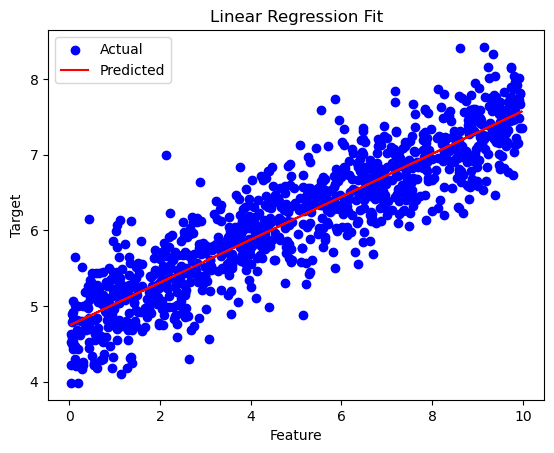

Mean Squared Error: 15.64513462225336
Mean Absolute Error: 3.851919096824402
R² Score: -79.54369257492925


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load datasets
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')
submission_sample = pd.read_csv('sample_submission.csv')

# Extract feature and target columns
X_train = training_data[['feature']]
y_train = training_data['target']

# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on training data
pred_train = linear_model.predict(X_train)

# Plot actual vs predicted values
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, pred_train, color='red', label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

# Predict on test data
X_test = testing_data[['feature']]
testing_data['prediction'] = linear_model.predict(X_test)

# Prepare submission file
submission_data = submission_sample.copy()
submission_data['prediction'] = testing_data['prediction']
submission_data.to_csv('predictions.csv', index=False)

# Calculate performance metrics
mse = mean_squared_error(submission_sample['prediction'], submission_data['prediction'])
mae = mean_absolute_error(submission_sample['prediction'], submission_data['prediction'])
r2 = r2_score(submission_sample['prediction'], submission_data['prediction'])

# Display results
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')
